In [1]:
# Import necessary libraries
from scipy.cluster.hierarchy import linkage,dendrogram
import pandas as pd
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn  as  sns
import numpy as np
import warnings
import os

warnings.simplefilter('ignore')
os.chdir('D:\Datasets')

df = pd.read_csv('nutrient.csv',index_col=0)
df

,energy,protein,fat,calcium,iron
Food_Item,,,,,
BEEF BRAISED,340,20,28,9,2.6
HAMBURGER,245,21,17,9,2.7
BEEF ROAST,420,15,39,7,2.0
BEEF STEAK,375,19,32,9,2.6
BEEF CANNED,180,22,10,17,3.7
CHICKEN BROILED,115,20,3,8,1.4
CHICKEN CANNED,170,25,7,12,1.5
BEEF HEART,160,26,5,14,5.9
LAMB LEG ROAST,265,20,20,9,2.6


# Dendrogram

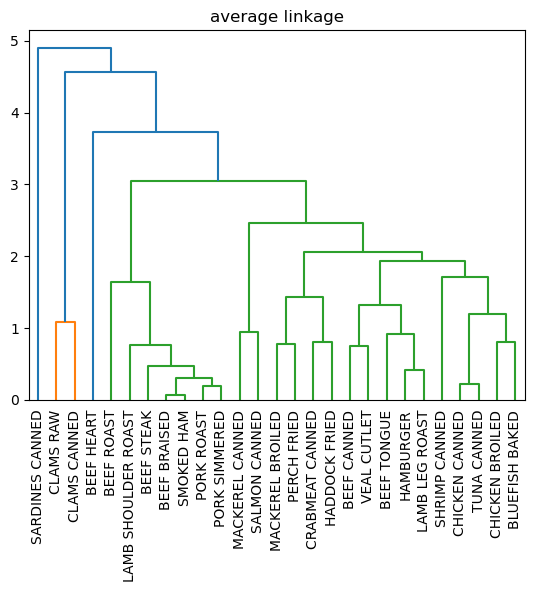

In [6]:
# Create a StandardScaler object and set the output to be a pandas DataFrame
scaler = StandardScaler().set_output(transform='pandas')

# Fit the scaler to the input DataFrame 'df' and transform the data
df_scaled = scaler.fit_transform(df)

# Set the linkage method to 'average'
link = 'average'

# Perform hierarchical clustering using the specified linkage method
mergings = linkage(df_scaled, method=link)

# Create a dendrogram plot using the clustering results
dendrogram(mergings, labels=list(df_scaled.index))

# Set the title of the plot to the linkage method used
plt.title(link + ' linkage')

# Rotate the x-axis labels by 90 degrees for better visibility
plt.xticks(rotation=90)

# Display the plot
plt.show()

# AgglomerativeClustering

In [7]:
# Create an AgglomerativeClustering object with 4 clusters
clust = AgglomerativeClustering(n_clusters=4)

# Fit the clustering model to the scaled DataFrame
clust.fit(df_scaled)

# Print the cluster labels assigned to each data point
print(clust.labels_)

# Calculate the silhouette score for the clustering results
print(silhouette_score(df_scaled, clust.labels_))

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 3 0 0]
0.41580070002787306


# silhouette_score

In [8]:
# Define a list of potential number of clusters to try
ks = [2, 3, 4, 5]

# Initialize a list to store the silhouette scores
scores = []

# Loop through the different number of clusters
for i in ks:
    # Create an AgglomerativeClustering object with i clusters
    clust = AgglomerativeClustering(n_clusters=i)
    
    # Fit the clustering model to the scaled DataFrame
    clust.fit(df_scaled)
    
    # Calculate the silhouette score for the current number of clusters
    scores.append(silhouette_score(df_scaled, clust.labels_))

# Find the index of the maximum silhouette score
i_max = np.argmax(scores)

# Print the best number of clusters and the corresponding silhouette score
print('best no. of clusters: ', ks[i_max])
print('best score: ', scores[i_max])

best no. of clusters:  4
best score:  0.41580070002787306


# cluster using best cluster no = 4

In [9]:
# Create an AgglomerativeClustering object with 4 clusters
clust = AgglomerativeClustering(n_clusters=4)

# Fit the clustering model to the scaled DataFrame
clust.fit(df_scaled)

# Print the cluster labels assigned to each data point
print(clust.labels_)

# Calculate the silhouette score for the clustering results
print(silhouette_score(df_scaled, clust.labels_))

# Define a list of potential number of clusters to try
ks = [2, 3, 4, 5]

# Initialize a list to store the silhouette scores
scores = []

# Loop through the different number of clusters
for i in ks:
    # Create an AgglomerativeClustering object with i clusters
    clust = AgglomerativeClustering(n_clusters=i)
    
    # Fit the clustering model to the scaled DataFrame
    clust.fit(df_scaled)
    
    # Calculate the silhouette score for the current number of clusters
    scores.append(silhouette_score(df_scaled, clust.labels_))

# Find the index of the maximum silhouette score
i_max = np.argmax(scores)

# Print the best number of clusters and the corresponding silhouette score
print('best no. of clusters: ', ks[i_max])
print('best score: ', scores[i_max])

[1 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 2 2 0 0 0 0 0 0 3 0 0]
0.41580070002787306
best no. of clusters:  4
best score:  0.41580070002787306
